In [76]:
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pickle

sns.set(font_scale=1.1)
#from injections import 

In [26]:
def shuffle_in_unison_scary(a, b):
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)
    return a,b

In [27]:
BBH_path='data_BBH'
BNS_path='data_BNS'
BBH_check_path='data_BBH_check'
BNS_check_path='data_BNS_check'

In [28]:
injections_BNS = pickle.load(open(BNS_path+'/injections-BNS.p', "rb"))
injections_BBH = pickle.load(open(BBH_path+'/injections-BBH.p', "rb"))
injections_BNS_check = pickle.load(open(BNS_check_path+'/injections-BNS.p', "rb"))
injections_BBH_check = pickle.load(open(BBH_check_path+'/injections-BBH.p', "rb"))

In [55]:
mass_1=np.array([])
mass_2=np.array([])
mass_1_check=np.array([])
mass_2_check=np.array([])
identity=np.array([],dtype=bool)
identity_check=np.array([],dtype=bool)
#num_injections=len(injections_BNS)+len(injections_BBH)
#num_injections_check=len(injections_check_BNS)+len(injections_check_BBH)



for i in range(len(injections_BBH)):
    mass_1=np.append(mass_1,injections_BBH[i][0]["mass_1"])
    mass_2=np.append(mass_2,injections_BBH[i][0]["mass_2"])
    identity=np.append(identity,False)
    
for i in range(len(injections_BNS)):
    mass_1=np.append(mass_1,injections_BNS[i][0]["mass_1"])
    mass_2=np.append(mass_2,injections_BNS[i][0]["mass_2"])
    identity=np.append(identity,True)
    
#for i in range(len(injections_BNS_check)):
    #mass_1_check=np.append(mass_1_check,injections_BNS_check[i][0]["mass_1"])
    #mass_2_check=np.append(mass_2_check,injections_BNS_check[i][0]["mass_2"])
    #identity_check=np.append(identity_check,True)

#for i in range(len(injections_BBH_check)):
    #mass_1_check=np.append(mass_1_check,injections_BBH_check[i][0]["mass_1"])
    #mass_2_check=np.append(mass_2_check,injections_BBH_check[i][0]["mass_2"])
    #identity_check=np.append(identity_check,False)
  


mass_1_check=np.array([35.6,23.3,13.7,31.0,10.9,50.6,35.2,30.7,1.46,35.5,39.6])
mass_2_check=np.array([30.6,13.6,7.7,20.1,7.6,34.3,23.8,25.3,1.27,26.8,29.4])
identity_check=np.array([False,False,False,False,False,False,False,False,True,False,False])


num_injections=len(injections_BNS)+len(injections_BBH)
num_injections_check=len(mass_1_check)

print(num_injections)
print(num_injections_check)

#print(mass_1)

360
11


In [56]:
M_chirp=(mass_1*mass_2)**(3/5)/(mass_1+mass_2)**(1/5)
eta=(mass_1*mass_2)/(mass_1+mass_2)**2.0

M_chirp_check=(mass_1_check*mass_2_check)**(3/5)/(mass_1_check+mass_2_check)**(1/5)
eta_check=(mass_1_check*mass_2_check)/(mass_1_check+mass_2_check)**2.0


print(M_chirp_check)
print(eta_check)

[28.71648349 15.38620889  8.86837442 21.62969875  7.89786505 36.1314378
 25.10159799 24.23916933  1.18484466 26.7991043  29.63846392]
[0.24857385 0.2327245  0.23034763 0.23862501 0.24204529 0.2407849
 0.24066648 0.24767538 0.24878906 0.24512469 0.24453686]


In [64]:
# For now we have 2features, so let's use 2N+1 neighbors
num_neighbors = 5
KNC = KNeighborsClassifier(num_neighbors)

In [72]:
X_train = np.column_stack([M_chirp,eta])
Y_train = identity



X_train=np.reshape(X_train,(num_injections,2))

#X_train, Y_train=shuffle_in_unison_scary(X_train, Y_train)

X_train.shape, Y_train.shape

#print(M_chirp[1],eta[1])
#print(X_train[1])

#print(X_train)
#print(Y_train)

4.977805938656289 0.24883167912601017
[4.97780594 0.24883168]


In [66]:
KNC.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [67]:
X_check=np.column_stack([M_chirp_check,eta_check])
print(len(X_check[0]))
Y_check= identity_check
X_check=np.reshape(X_check,(num_injections_check,2))
    
real_sol=KNC.predict(X_check)
#print(Y_check,real_sol)

Comparison=[Y_check==real_sol]
ind=[~Y_check==real_sol]
num_right=np.sum(Comparison)

print(real_sol)
print(Comparison)
#ind=np.where(X_check[Comparison])
print(X_check[ind])
frac_right=num_right/num_injections_check
    
#tot_num_right=tot_num_right+num_right
print(frac_right)


#print(tot_num_right/(checks*check_points))

2
[False False False False False False False False  True False False]
[array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])]
[]
1.0


/miniconda3/envs/genv/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()


In [73]:
data={r'$\mathcal{M}$' : M_chirp, r'$\eta$' : eta, 'identity' : identity}
datapanda=pd.DataFrame(data=data)

data_check={r'$\mathcal{M}$' : M_chirp_check, r'$\eta$' : eta_check, 'identity' : identity_check}
datapanda_check=pd.DataFrame(data=data_check)

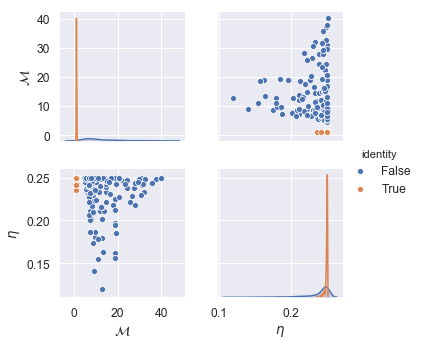

In [77]:
pairplots = sns.pairplot(datapanda,vars=[r'$\mathcal{M}$',r'$\eta$'],hue='identity',diag_kind='auto')

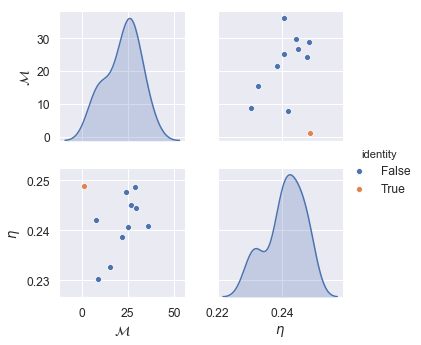

In [78]:
pairplots_check = sns.pairplot(datapanda_check,vars=[r'$\mathcal{M}$',r'$\eta$'],hue='identity',diag_kind='auto')